In [2]:
import random
from tqdm import tqdm
import math
import torch
import matplotlib.pyplot as plt

random.seed(2024)
k = 3
initial_times = 10
N = 160
T = 1600
arm_prob = [i/(k-1) for i in range(k)]


def draw(x):
    reward = 1 if random.random() < arm_prob[x] else 0
    return reward




def get_state(epoch):
    lcb, ucb = [], []
    for arm in range(k):
        avg_re = total_reward[arm]/times[arm]
        var_re = (math.log((epoch + initial_times*k)*k)/times[arm])
        lcb.append(avg_re - var_re)
        ucb.append(avg_re + var_re)

    max_lcb = max(lcb)
    #print(f"maxlcb:{max_lcb}")
    state = [1 if ucb[i] > max_lcb else 0 for i in range(k)]
    return state

def get_action(state):
    num_choices = sum(state)
    action = random.randint(1, num_choices)
    count,pos = 0,-1
    while count < action:
        pos += 1
        if state[pos] == 1:
            count += 1

    return [0 if i != pos else 1 for i in range(k)], pos


all_result = []
encode=torch.tensor([2**i for i in range(k)])
for _ in tqdm(range(N)):
    #np.random.shuffle(arm_prob)
    flag = True
    result = []
    
    total_reward = [sum([draw(i) for _ in range(initial_times)]) for i in range(k)]
    times = [initial_times for _ in range(k)]

    for epoch in range(T):
        state = get_state(epoch)
        action, pos = get_action(state)
        id=(2**k)*pos + encode@torch.tensor(state)
        result.append(id)
        times[pos] += 1
        total_reward[pos] += draw(pos)

        if sum(state) == 1 and flag:
            my_epoch = epoch
            flag = False

    #print('Epoch:', my_epoch)
    all_result.append(result)

all_result = torch.tensor(all_result)
all_result

100%|██████████| 160/160 [00:01<00:00, 121.59it/s]


tensor([[14, 22, 14,  ..., 20, 20, 20],
        [14, 22, 22,  ..., 20, 20, 20],
        [22, 14, 14,  ..., 20, 20, 20],
        ...,
        [22, 22, 14,  ..., 20, 20, 20],
        [14, 22, 22,  ..., 20, 20, 20],
        [22, 14, 22,  ..., 20, 20, 20]])

In [ ]:
import random
from tqdm import tqdm
import math
import torch
import matplotlib.pyplot as plt

#random.seed(2024)
k = 8
initial_times = 10
N = 1600
T = 512
gap=0.2
arm_prob = [1/2, 1/2-gap]+[1/100 for i in range(k-2)]


def draw(x):
    reward = 1 if random.random() < arm_prob[x] else 0
    return reward




def get_state(epoch):
    lcb, ucb = [], []
    for arm in range(k):
        avg_re = total_reward[arm]/times[arm]
        var_re = (math.log((epoch + initial_times*k)*k)/times[arm])
        lcb.append(avg_re - var_re)
        ucb.append(avg_re + var_re)

    max_lcb = max(lcb)
    #print(f"maxlcb:{max_lcb}")
    state = [1 if ucb[i] > max_lcb else 0 for i in range(k)]
    return state

def get_state_ucb(epoch):
    lcb, ucb = [], []
    for arm in range(k):
        avg_re = total_reward[arm]/times[arm]
        var_re = (math.log((epoch + initial_times*k)*k)/times[arm])
        lcb.append(avg_re - var_re)
        ucb.append(avg_re + var_re)

    max_lcb = np.argmax(np.array(lcb))
    #print(f"maxlcb:{max_lcb}")
    state = [1 if i==max_lcb else 0 for i in range(k) ]
    return state


def get_action(state):
    num_choices = sum(state)
    action = random.randint(1, num_choices)
    count,pos = 0,-1
    while count < action:
        pos += 1
        if state[pos] == 1:
            count += 1

    return [0 if i != pos else 1 for i in range(k)], pos




all_result = []
my_epoch=[]
times = [initial_times for _ in range(k)]
for try_arm in range(k):
    for _ in range(initial_times):
        id=(2**k)*try_arm + 2**k-1
        result.append(id)
encode=torch.tensor([2**i for i in range(k)])
for _ in tqdm(range(N)):
    #np.random.shuffle(arm_prob)
    flag = True
    result = []
    
    total_reward = [sum([draw(i) for _ in range(initial_times)]) for i in range(k)]
    times = [initial_times for _ in range(k)]

    for epoch in range(T):
        state = get_state_ucb(epoch)
        action, pos = get_action(state)
        #id=(2**k)*pos + encode@torch.tensor(state)
        result.append(pos)
        times[pos] += 1
        total_reward[pos] += draw(pos)

        if sum(state) == 1 and flag:
            my_epoch.append(epoch)
            flag = False

    #print('Epoch:', my_epoch)
    all_result.append(result)

all_result = torch.tensor(all_result)
all_result

In [4]:
import numpy as np
my_epoch=np.array(my_epoch)
np.mean(my_epoch+initial_times*k)

48.0

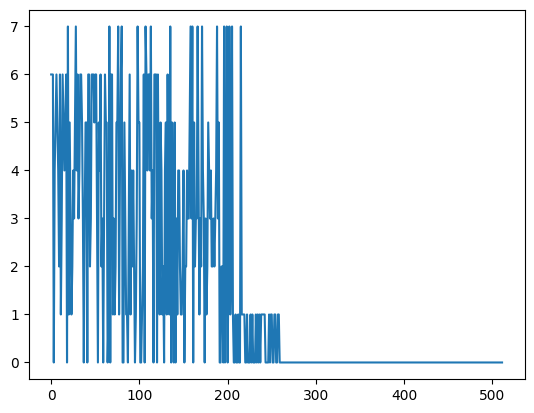

In [50]:
plt.plot(all_result[0])

(array([ 24., 101., 222., 289., 305., 249., 185., 115.,  56.,  34.]),
 array([ 69., 113., 157., 201., 245., 289., 333., 377., 421., 465., 509.]),
 <BarContainer object of 10 artists>)

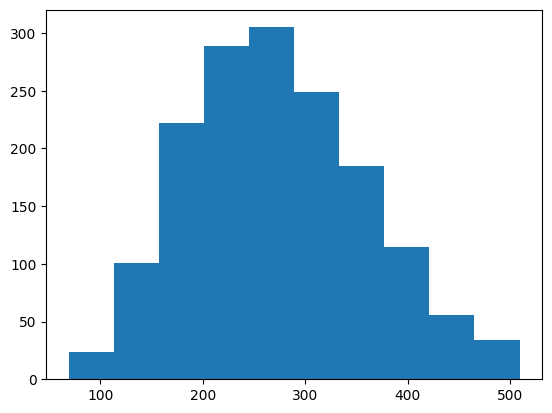

In [45]:
plt.hist(my_epoch)

In [ ]:
for id in all_result[0]:
    state=f'{int(id%(2**k)):08b}'
    action = id //(2**k)
    print(f"state:{state} action: {action}")

In [116]:
import random
from tqdm import tqdm
import math
import torch
import matplotlib.pyplot as plt

random.seed(2024)



def draw(x):
    reward = 1 if random.random() < arm_prob[x] else 0
    return reward




def get_state(epoch):
    lcb, ucb = [], []
    for arm in range(k):
        avg_re = total_reward[arm]/times[arm]
        var_re = (math.log((epoch + initial_times*k)*k)/times[arm])
        lcb.append(avg_re - var_re)
        ucb.append(avg_re + var_re)

    max_lcb = max(lcb)
    state = [1 if ucb[i] > max_lcb else 0 for i in range(k)]
    return state

def get_action(state):
    num_choices = sum(state)
    action = random.randint(1, num_choices)
    count,pos = 0,-1
    while count < action:
        pos += 1
        if state[pos] == 1:
            count += 1

    return [0 if i != pos else 1 for i in range(k)], pos



for n in range(7,12):
    for K in [2,3,4]:
        k = K
        encode=torch.tensor([2**i for i in range(k)])
        initial_times = 10
        N = 2**n * 5
        T = 512
        arm_prob = [random.random() for i in range(k)]
        all_result = []
        for _ in tqdm(range(N)):
            #np.random.shuffle(arm_prob)
            flag = True
            result = []

            total_reward = [sum([draw(i) for _ in range(initial_times)]) for i in range(k)]
            
            times = [initial_times for _ in range(k)]
            for try_arm in range(k):
                for _ in range(initial_times):
                    id=(2**k)*try_arm + 2**k-1
                    result.append(id)
                


            for epoch in range(T-initial_times*k):
                state = get_state(epoch)
                action, pos = get_action(state)
                id=(2**k)*pos + encode@torch.tensor(state)
                result.append(id)
                times[pos] += 1
                total_reward[pos] += draw(pos)

                if sum(state) == 1 and flag:
                    my_epoch = epoch
                    flag = False

            #print('Epoch:', my_epoch)
            all_result.append(result)

        all_result = torch.tensor(all_result)
        print(all_result.shape)

        torch.save(all_result,f"/bicmr/home/hengyuf04/Diffusion/multinomial_diffusion2/text_diffusion/datasets/bandit/bandit_K{k}_N{N}_random.npy")

100%|██████████| 640/640 [00:05<00:00, 116.26it/s]


torch.Size([640, 512])


100%|██████████| 640/640 [00:04<00:00, 128.19it/s]


torch.Size([640, 512])


100%|██████████| 640/640 [00:05<00:00, 122.53it/s]


torch.Size([640, 512])


100%|██████████| 1280/1280 [00:10<00:00, 126.40it/s]


torch.Size([1280, 512])


100%|██████████| 1280/1280 [00:10<00:00, 125.13it/s]


torch.Size([1280, 512])


100%|██████████| 1280/1280 [00:10<00:00, 117.16it/s]


torch.Size([1280, 512])


100%|██████████| 2560/2560 [00:20<00:00, 123.09it/s]


torch.Size([2560, 512])


100%|██████████| 2560/2560 [00:20<00:00, 123.24it/s]


torch.Size([2560, 512])


100%|██████████| 2560/2560 [00:20<00:00, 124.52it/s]


torch.Size([2560, 512])


100%|██████████| 5120/5120 [00:39<00:00, 128.30it/s]


torch.Size([5120, 512])


100%|██████████| 5120/5120 [00:42<00:00, 121.32it/s]


torch.Size([5120, 512])


100%|██████████| 5120/5120 [00:41<00:00, 123.36it/s]


torch.Size([5120, 512])


100%|██████████| 10240/10240 [01:23<00:00, 122.21it/s]


torch.Size([10240, 512])


100%|██████████| 10240/10240 [01:21<00:00, 124.97it/s]


torch.Size([10240, 512])


100%|██████████| 10240/10240 [01:23<00:00, 122.80it/s]


torch.Size([10240, 512])


In [118]:
import random
from tqdm import tqdm
import math
import torch
import matplotlib.pyplot as plt

random.seed(2024)



def draw(x):
    reward = 1 if random.random() < arm_prob[x] else 0
    return reward




def get_state(epoch):
    lcb, ucb = [], []
    for arm in range(k):
        avg_re = total_reward[arm]/times[arm]
        var_re = (math.log((epoch + initial_times*k)*k)/times[arm])
        lcb.append(avg_re - var_re)
        ucb.append(avg_re + var_re)

    max_lcb = max(lcb)
    state = [1 if ucb[i] > max_lcb else 0 for i in range(k)]
    return state

def get_action(state):
    num_choices = sum(state)
    action = random.randint(1, num_choices)
    count,pos = 0,-1
    while count < action:
        pos += 1
        if state[pos] == 1:
            count += 1

    return [0 if i != pos else 1 for i in range(k)], pos

for n in range(7,12):
    for K in [2,4,8]:
        k = K
        initial_times = 10
        N = 2**n * 5
        T = 512
        arm_prob = [random.random() for i in range(k)]
        all_result = []
        for _ in tqdm(range(N)):
            #np.random.shuffle(arm_prob)
            flag = True
            result = []

            total_reward = [sum([draw(i) for _ in range(initial_times)]) for i in range(k)]
            times = [initial_times for _ in range(k)]
            for try_arm in range(k):
                for _ in range(initial_times):
                    result.append(try_arm)
                

            for epoch in range(T-initial_times*k):
                state = get_state(epoch)
                action, pos = get_action(state)
                
                result.append(pos)
                times[pos] += 1
                total_reward[pos] += draw(pos)

                if sum(state) == 1 and flag:
                    my_epoch = epoch
                    flag = False

            #print('Epoch:', my_epoch)
            all_result.append(result)

        all_result = torch.tensor(all_result)
        torch.save(all_result,f"/bicmr/home/hengyuf04/Diffusion/multinomial_diffusion2/text_diffusion/datasets/bandit/bandit_K{k}_N{N}_random.npy")

100%|██████████| 10240/10240 [00:28<00:00, 353.64it/s]


In [182]:
torch.save(all_result,"bandit.npy")

In [50]:
torch.load("bandit.npy")

FileNotFoundError: [Errno 2] No such file or directory: 'bandit.npy'

In [53]:
parser = argparse.ArgumentParser()
add_data_args(parser)


In [54]:
parser

ArgumentParser(prog='ipykernel_launcher.py', usage=None, description=None, formatter_class=<class 'argparse.HelpFormatter'>, conflict_handler='error', add_help=True)

In [191]:
sample=torch.load("./datasets/bandit/sample_ep10_s0_chain (1).txt")

In [192]:
sample.shape

torch.Size([1000, 1, 512])

FileNotFoundError: [Errno 2] No such file or directory: '/bicmr/home/hengyuf04/Diffusion/multinomial_diffusion2/text_diffusion/samples/sample_chain_N10240_K4_randomnew.txt'

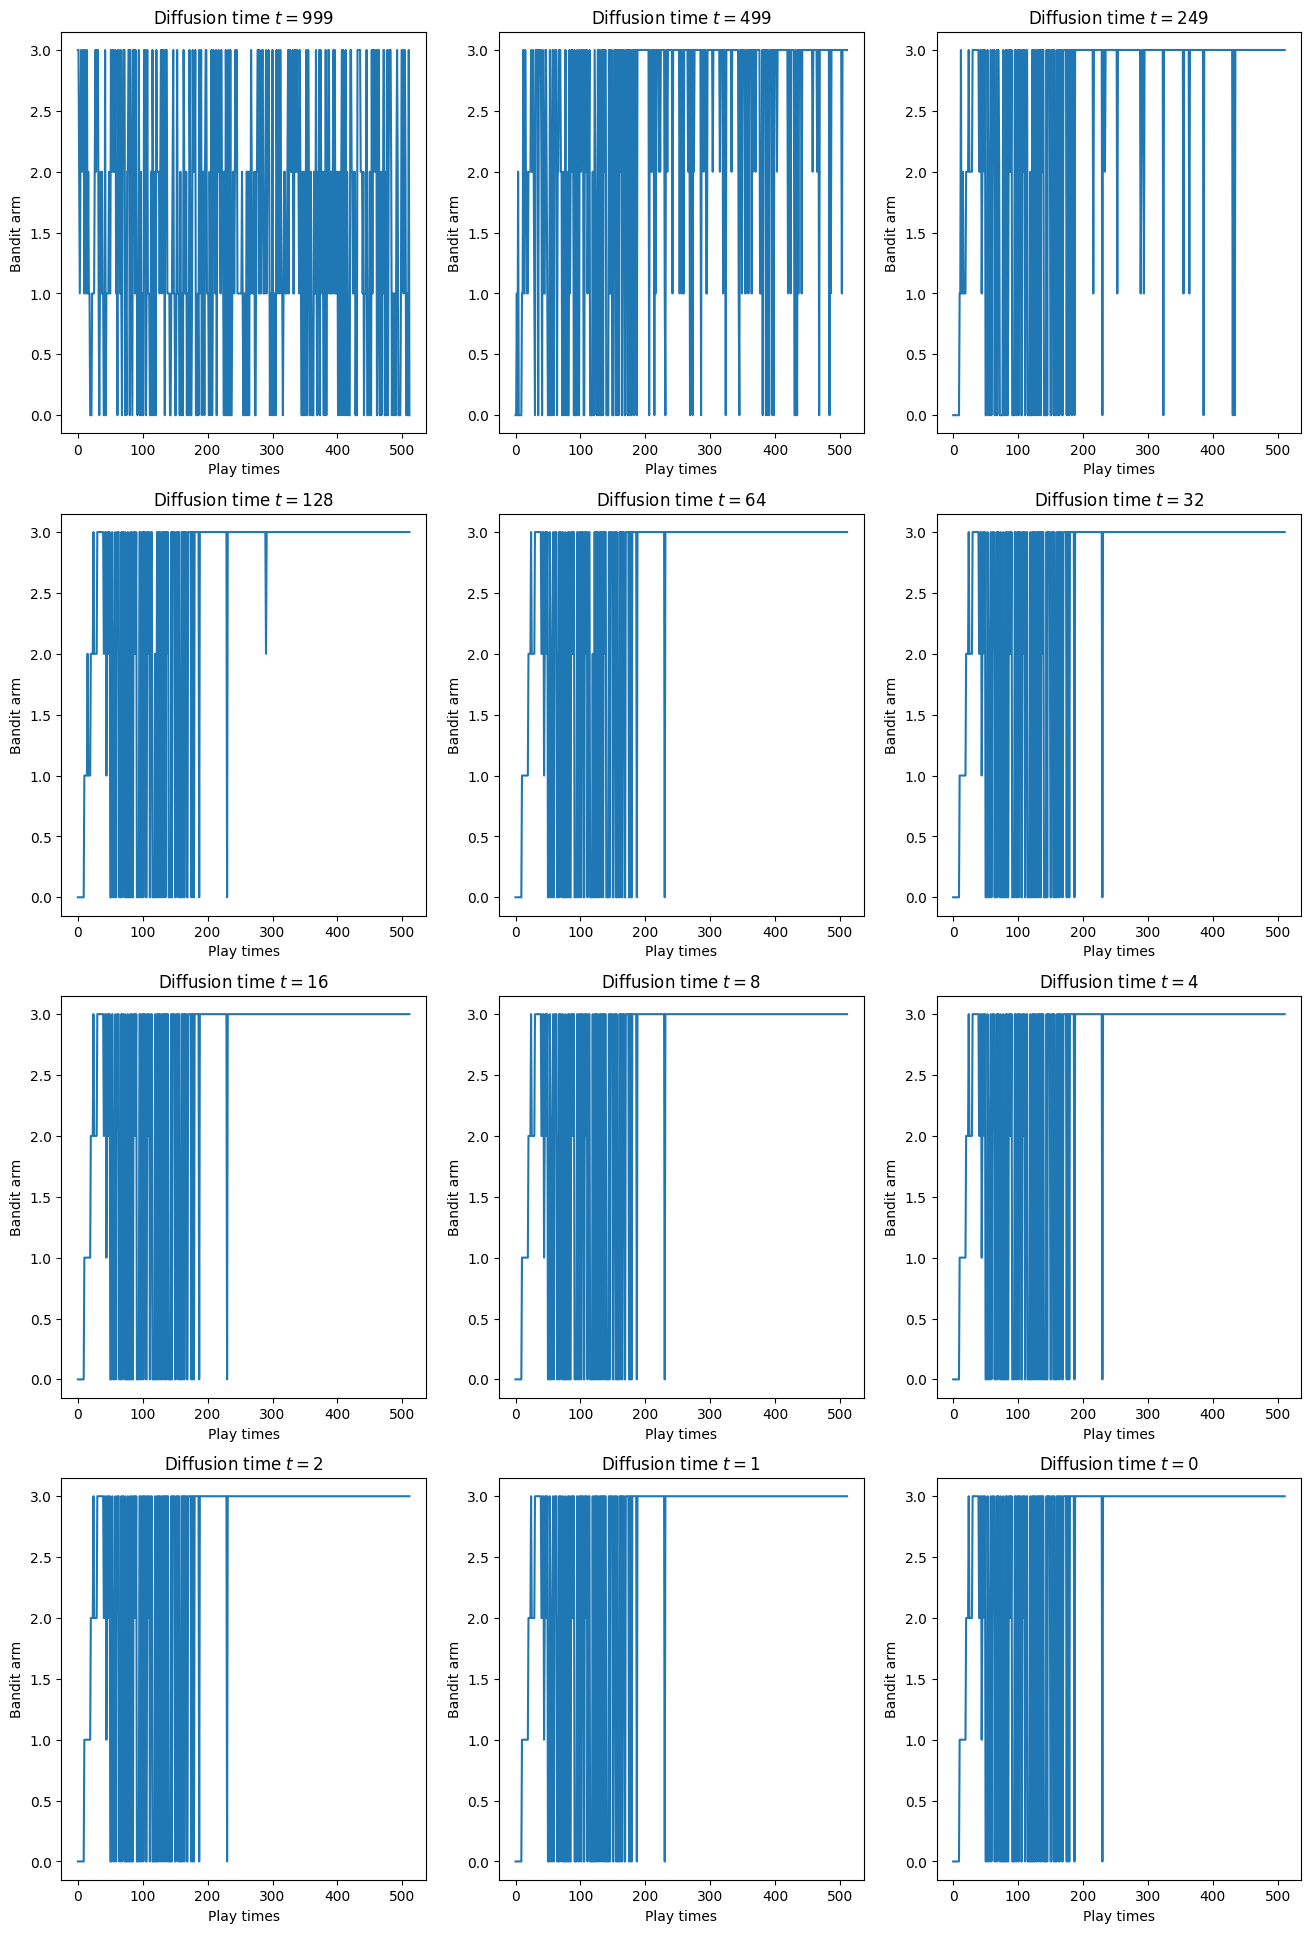

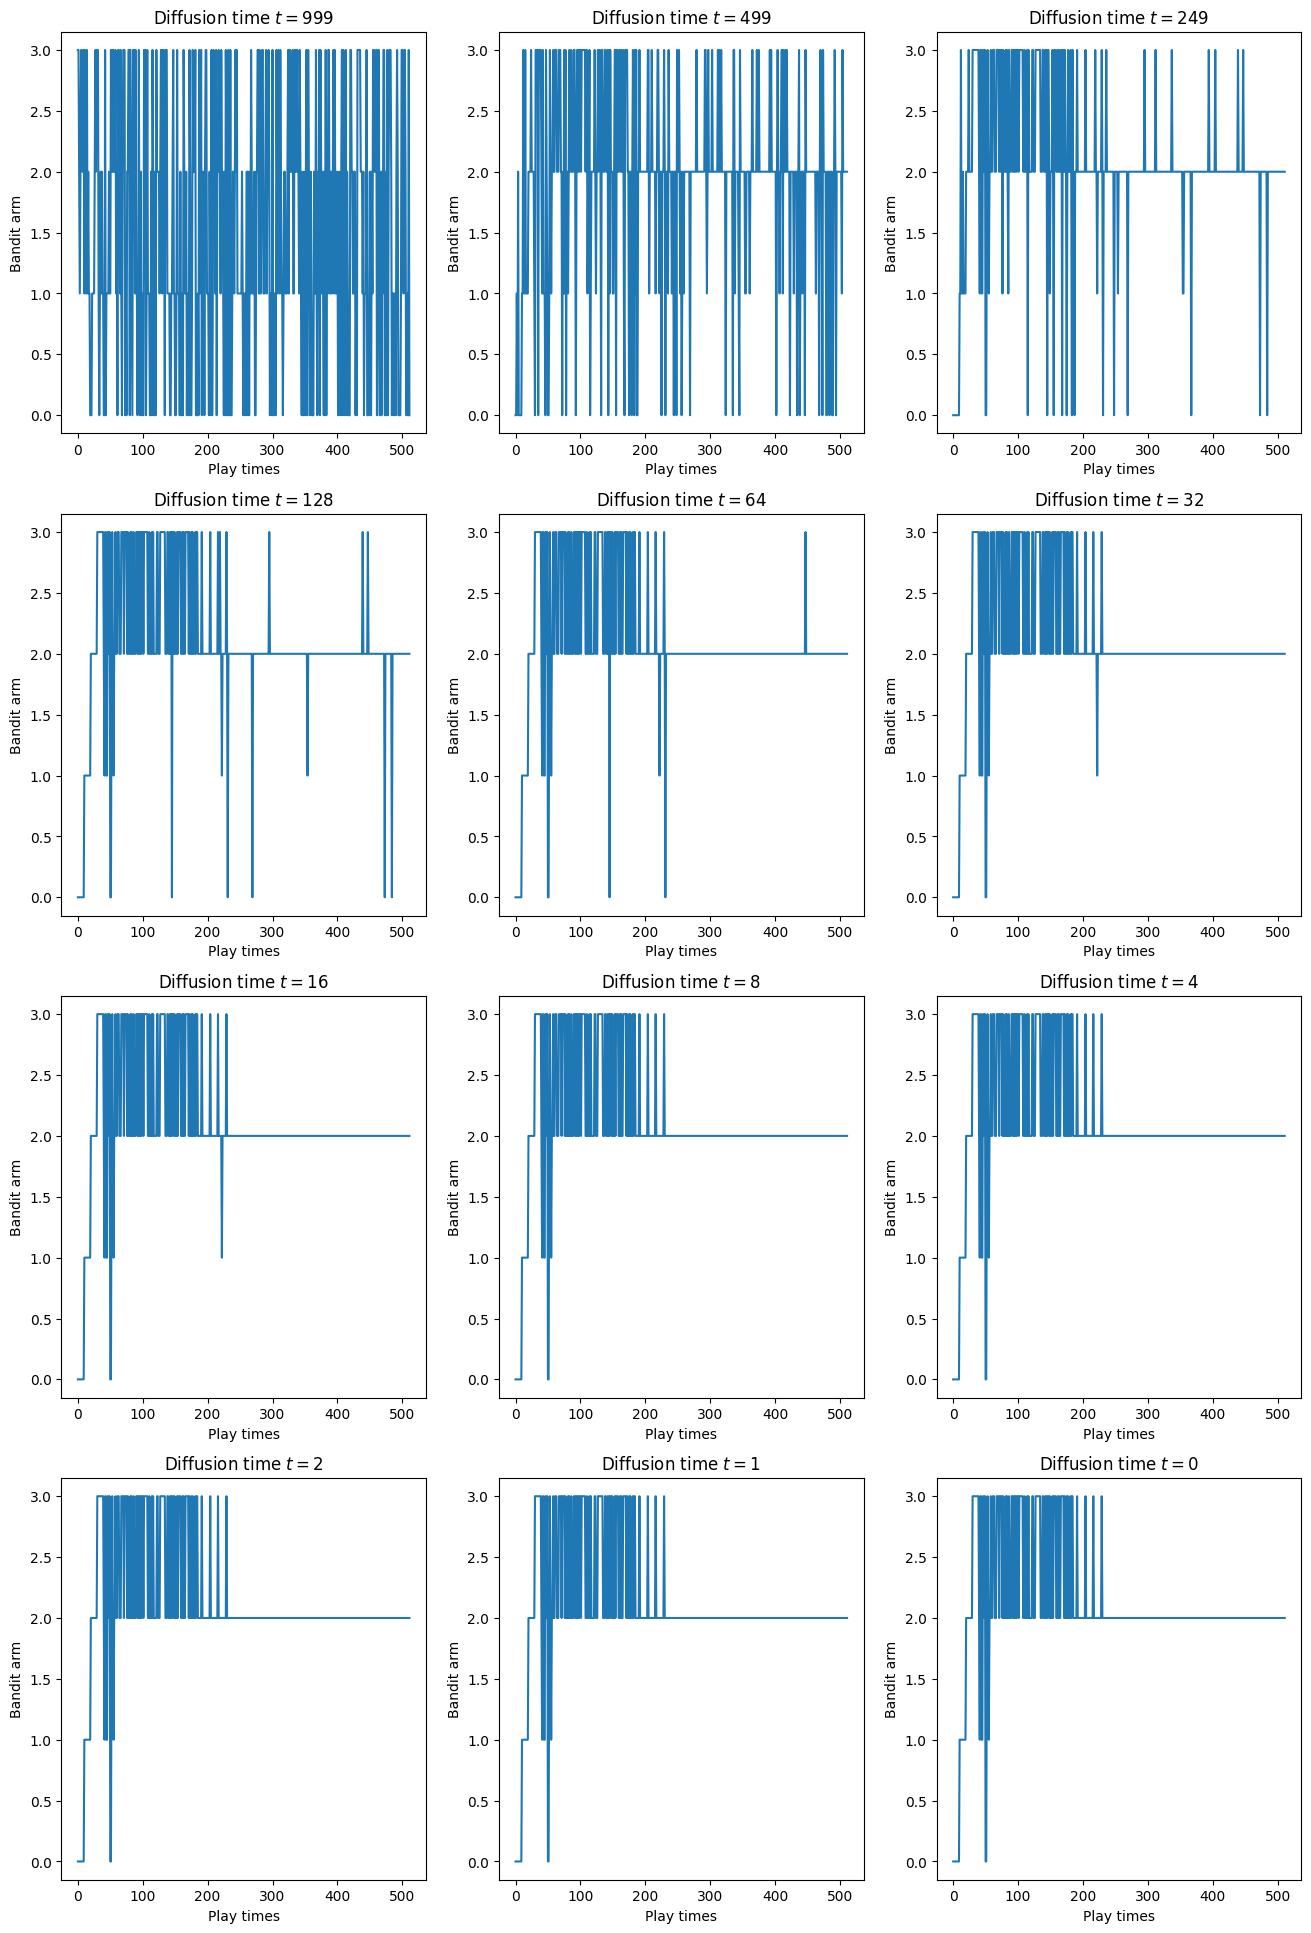

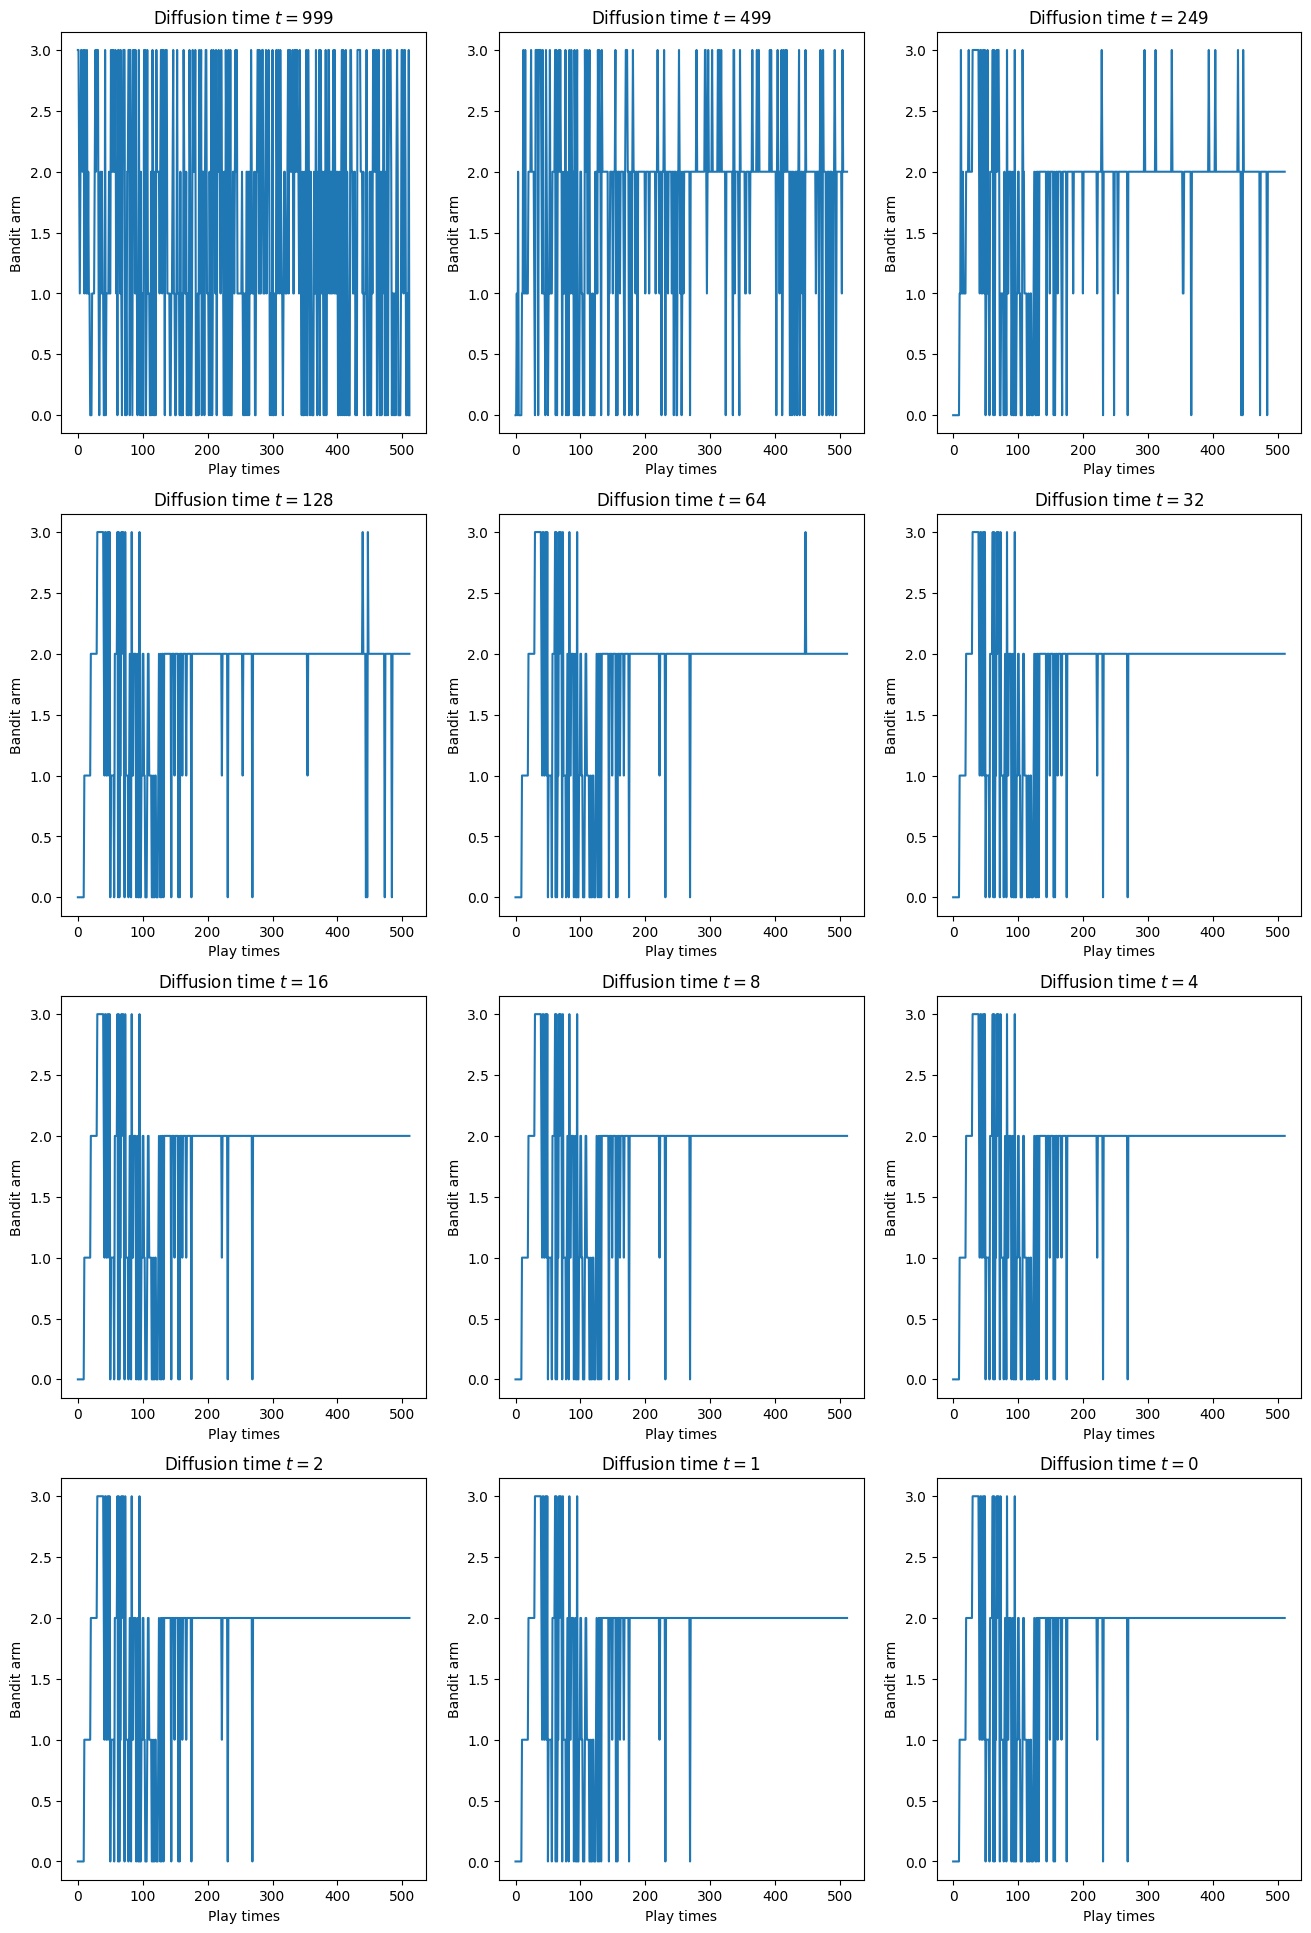

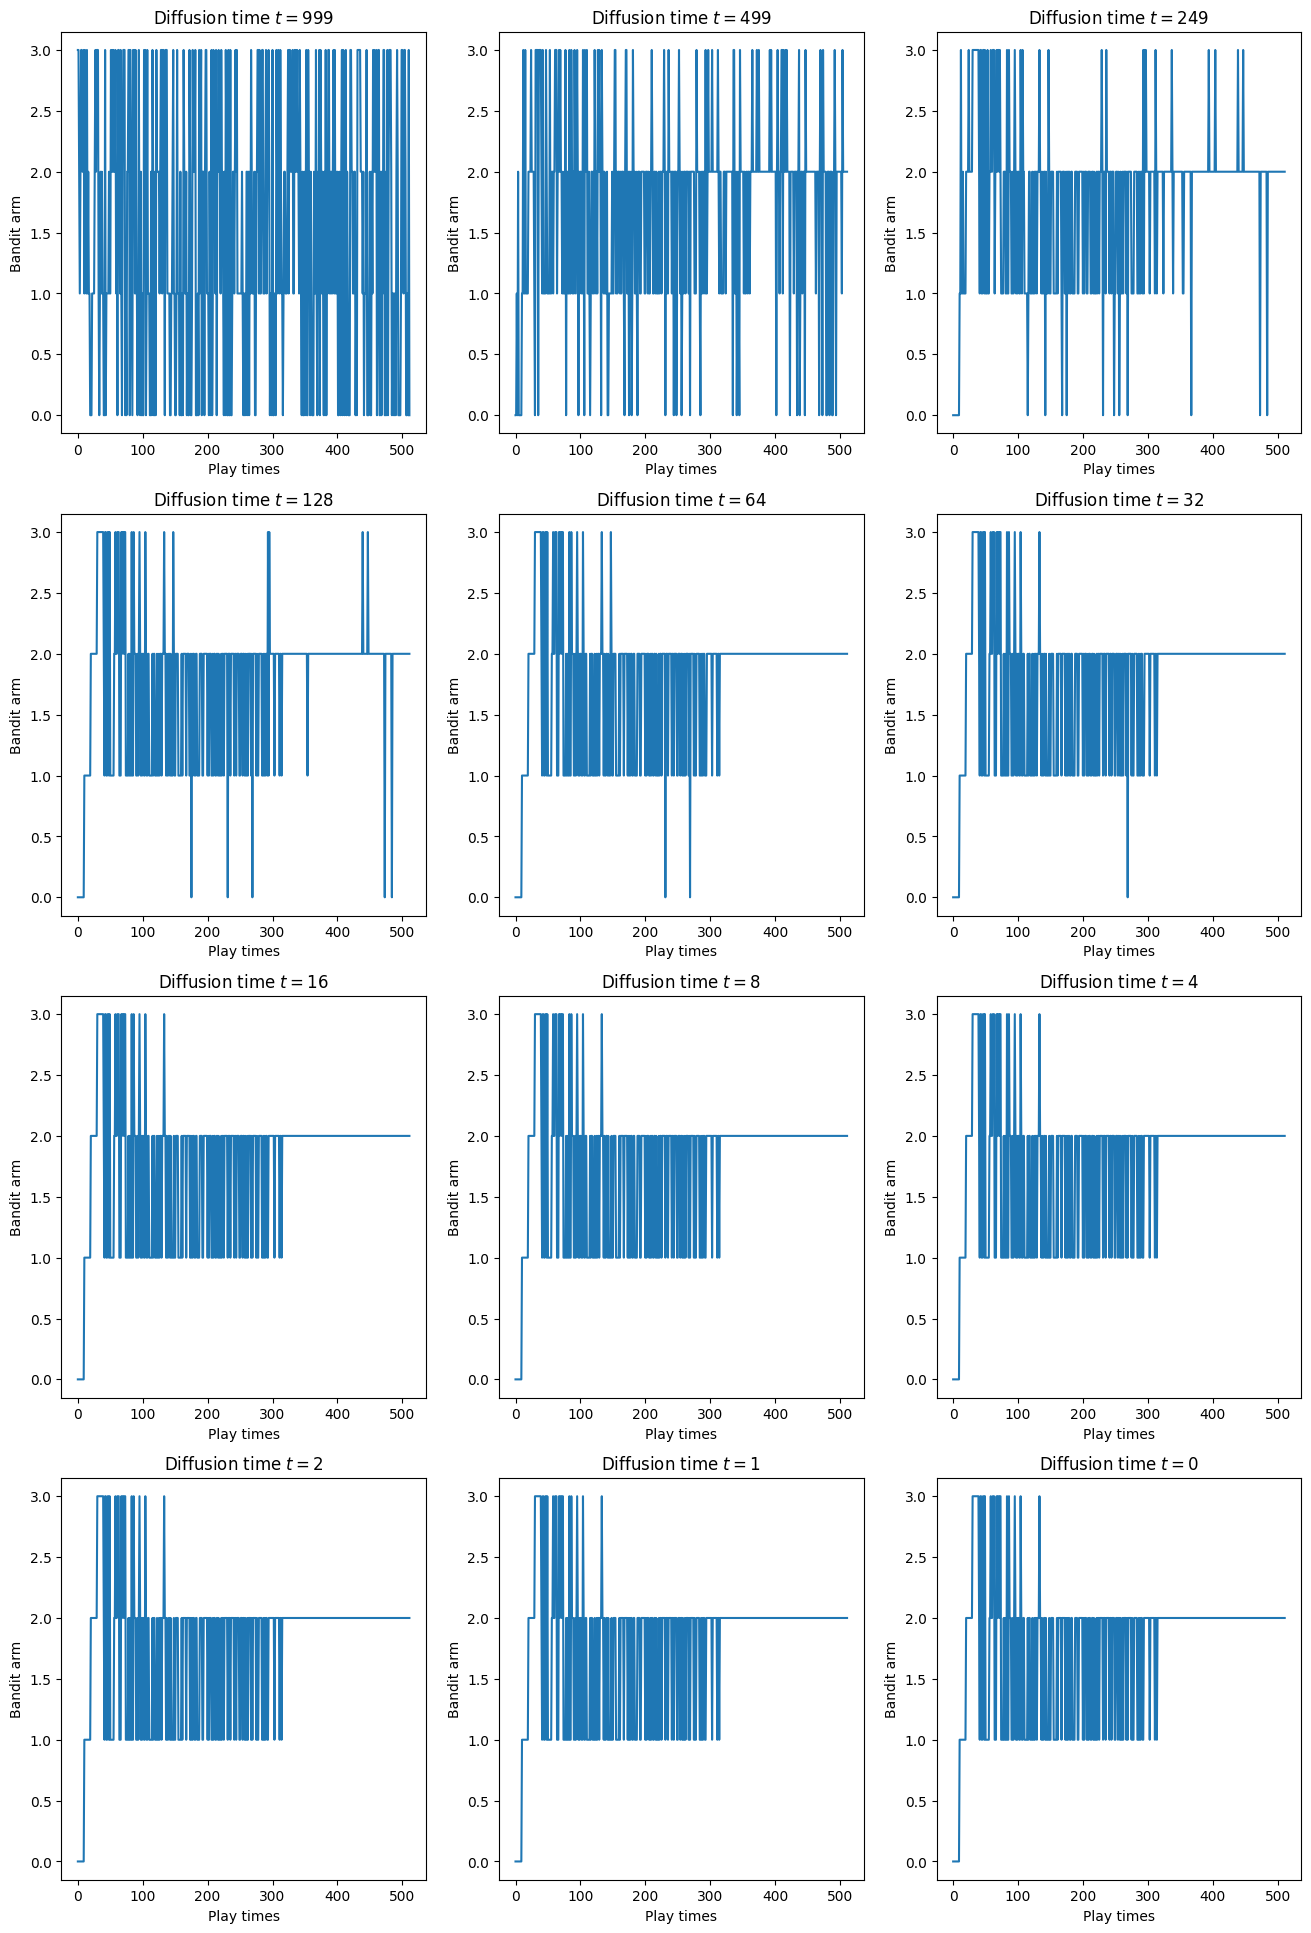

In [10]:
n=7
N=(2**n)*5
K=8
for n in range(7,12):
    for K in [4]:
        N=(2**n)*5
        sample=torch.load(f"/bicmr/home/hengyuf04/Diffusion/multinomial_diffusion2/text_diffusion/samples/sample_chain_N{N}_K{K}_randomnew.txt")
        show_t=[999,499,249,128,64,32,16,8,4,2,1,0]
        sample_num=0
        fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(16, 24))
        i = 0

        for ax in axes.flat:
            #ax.set_axis_off()
            ax.plot(sample[show_t[i], sample_num])
            ax.set_title(r"Diffusion time $t=$"+str(show_t[i]))
            ax.set_ylabel("Bandit arm")
            ax.set_xlabel("Play times")
            i = i+1
        plt.savefig(f"/bicmr/home/hengyuf04/Diffusion/multinomial_diffusion2/text_diffusion/figs/sample_chain_N{N}_K{K}_randomnew.png")



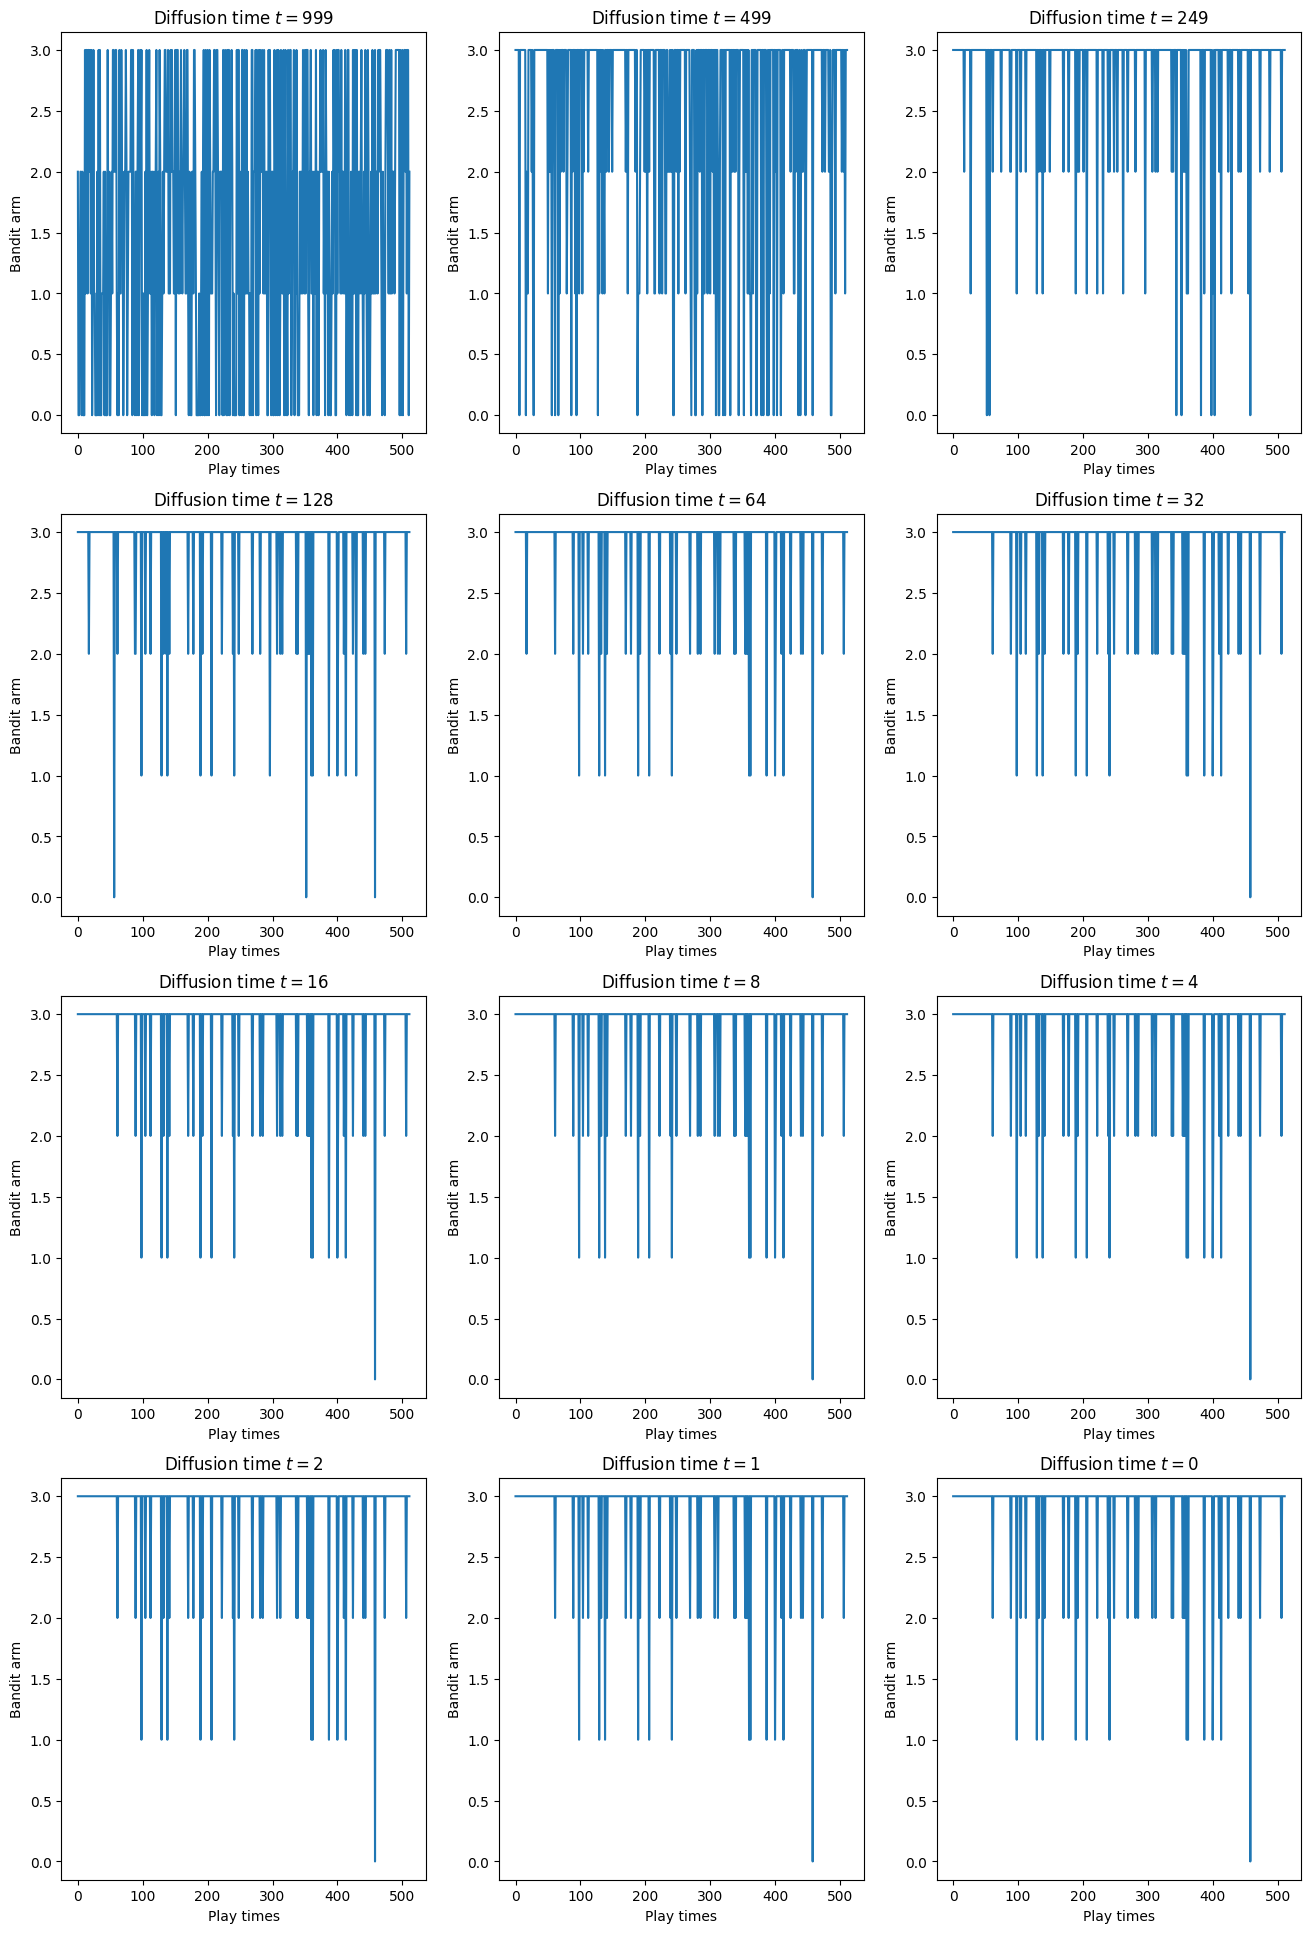

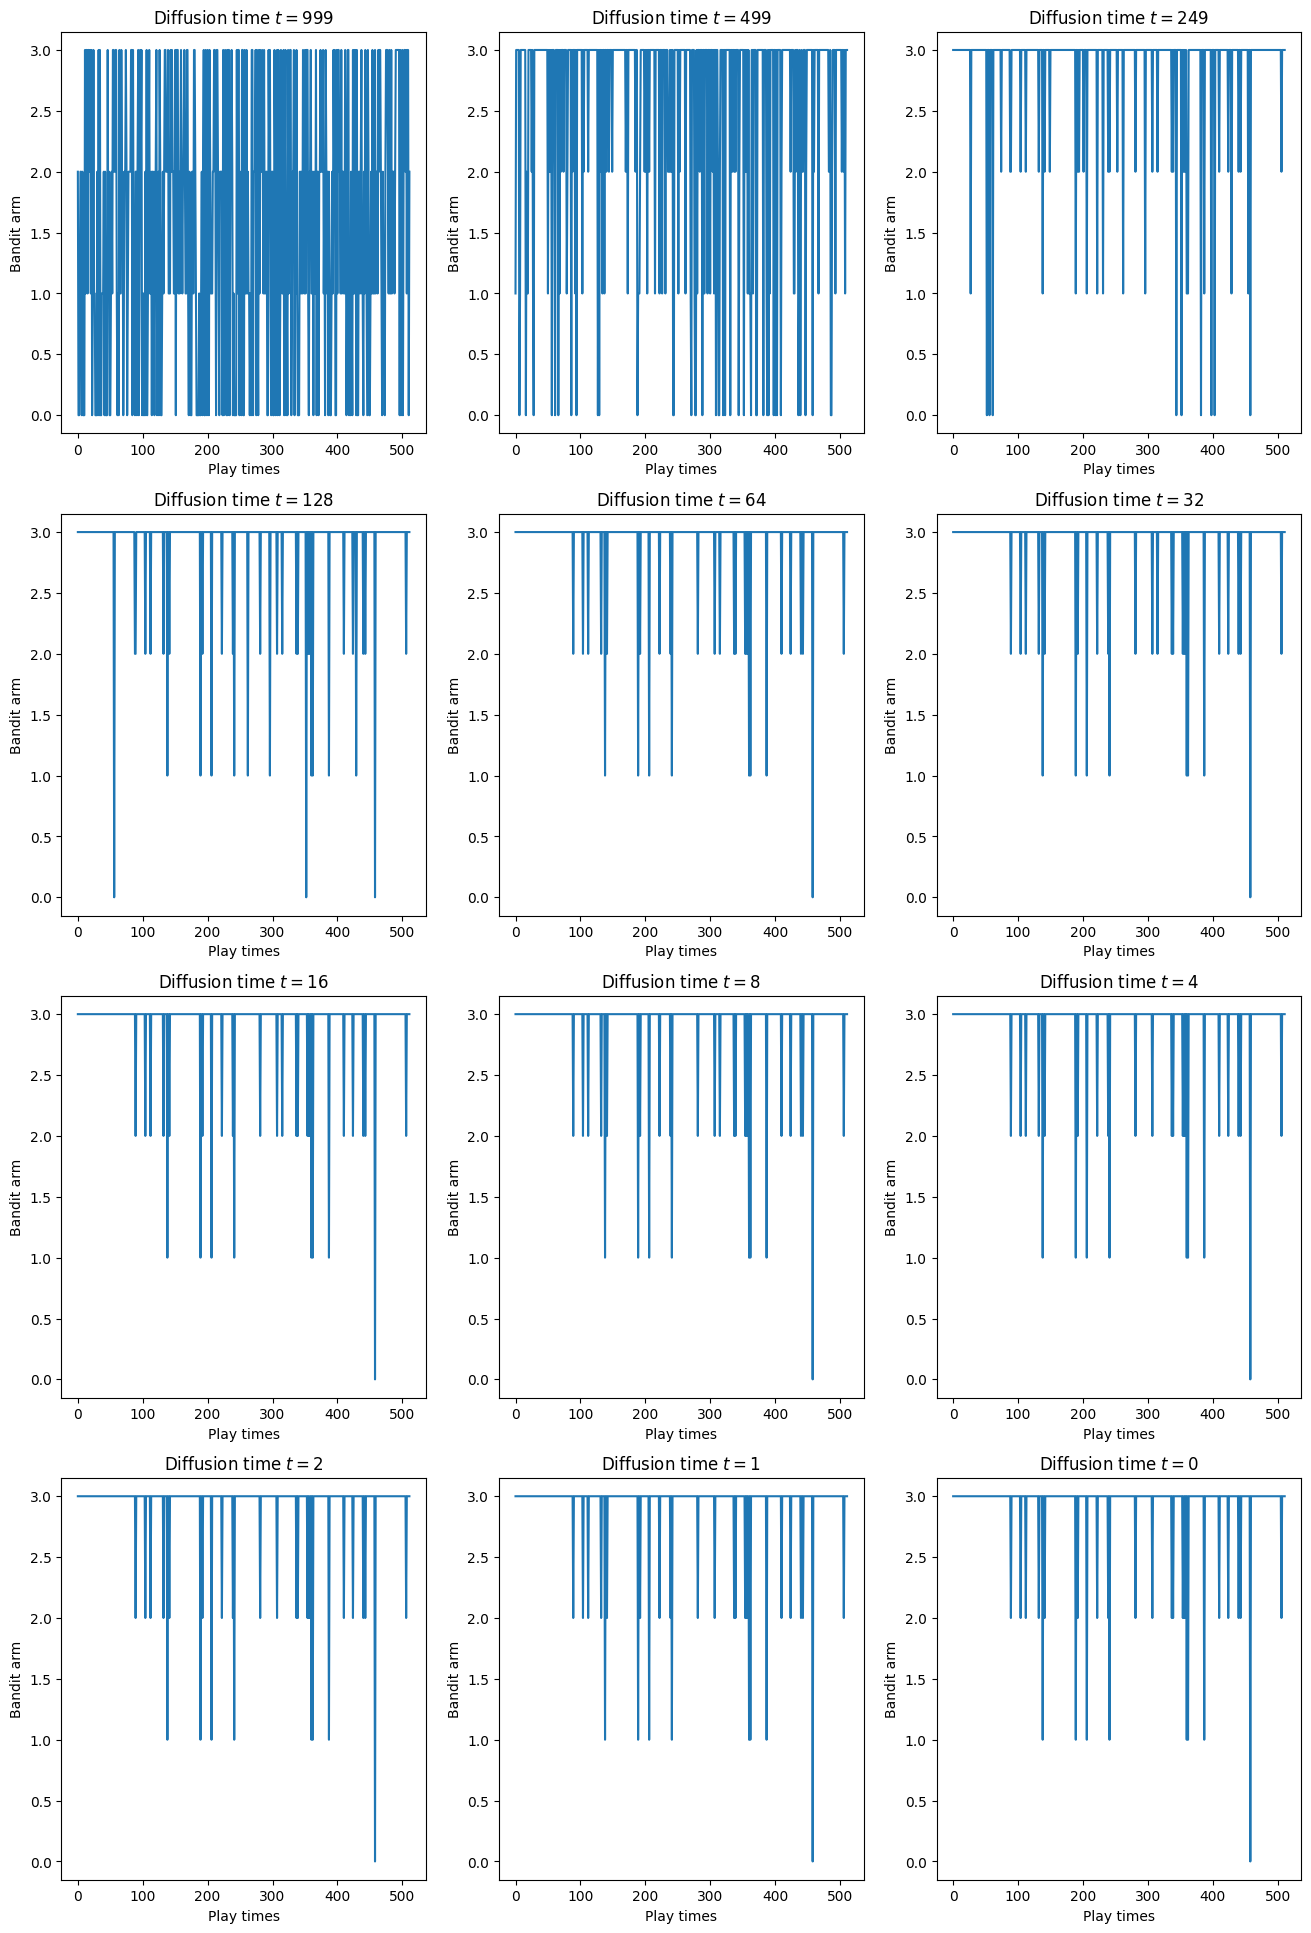

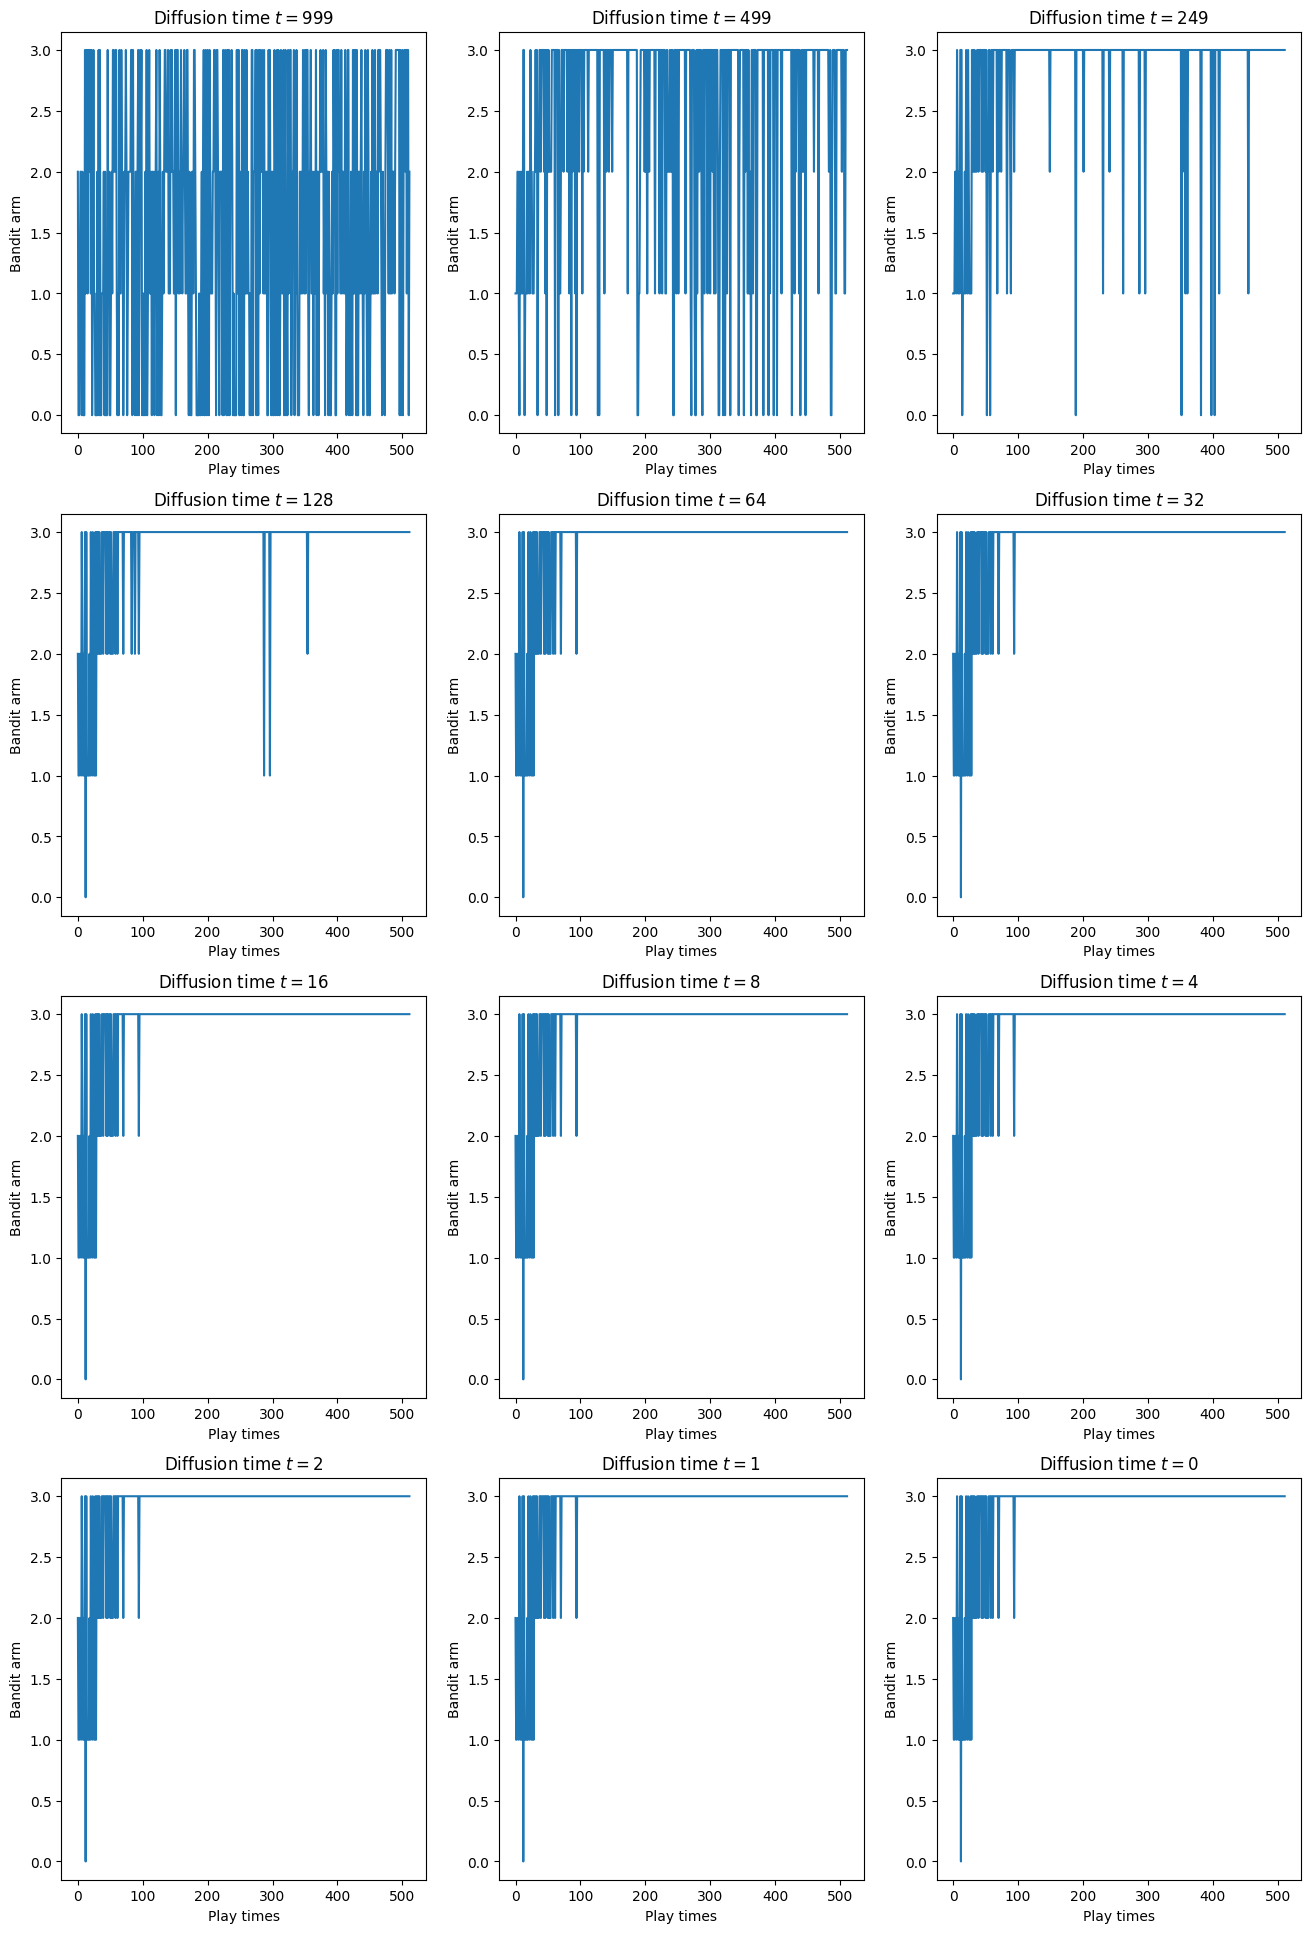

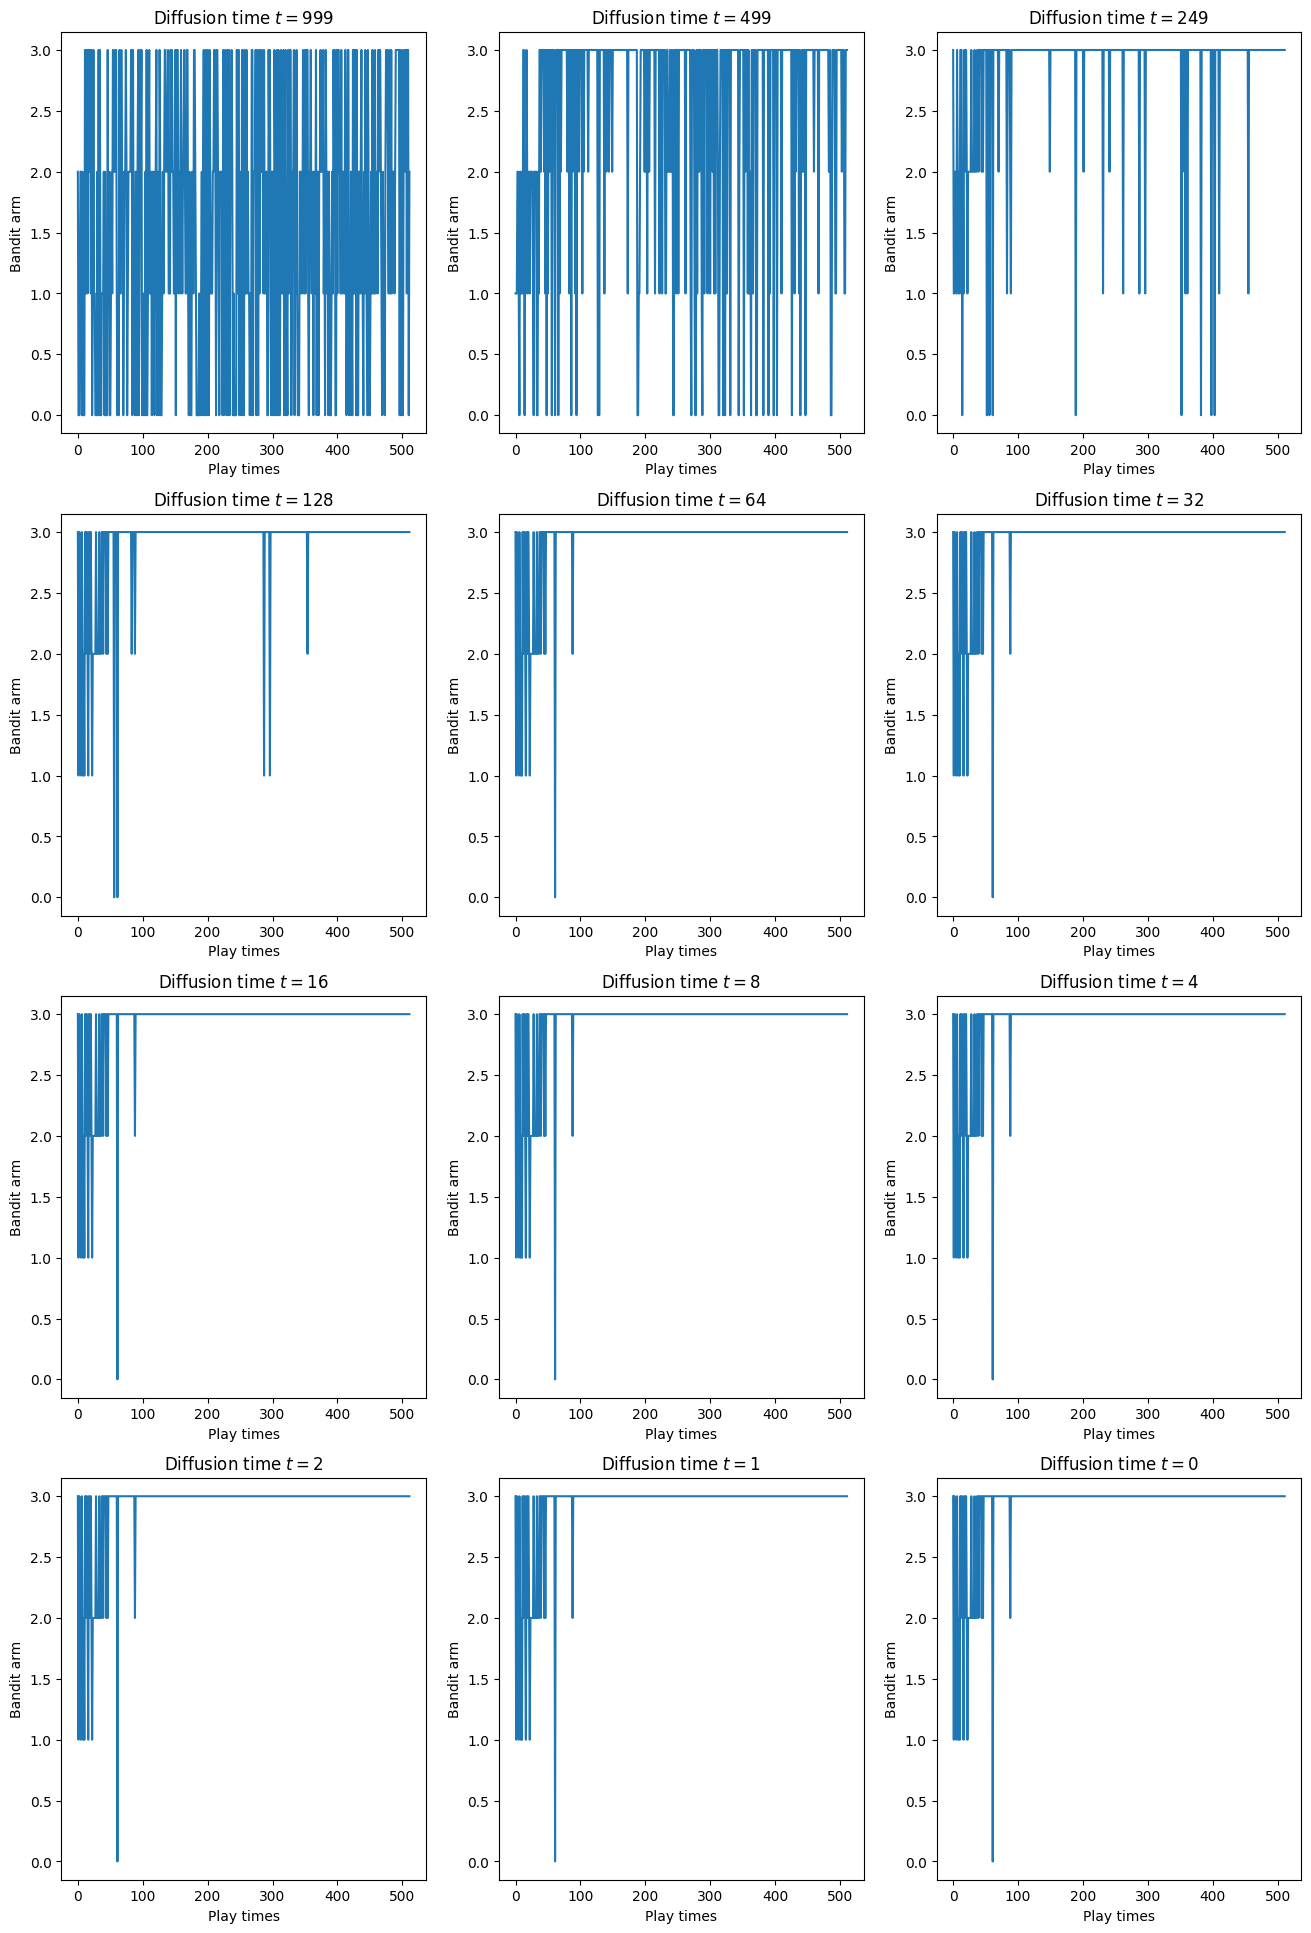

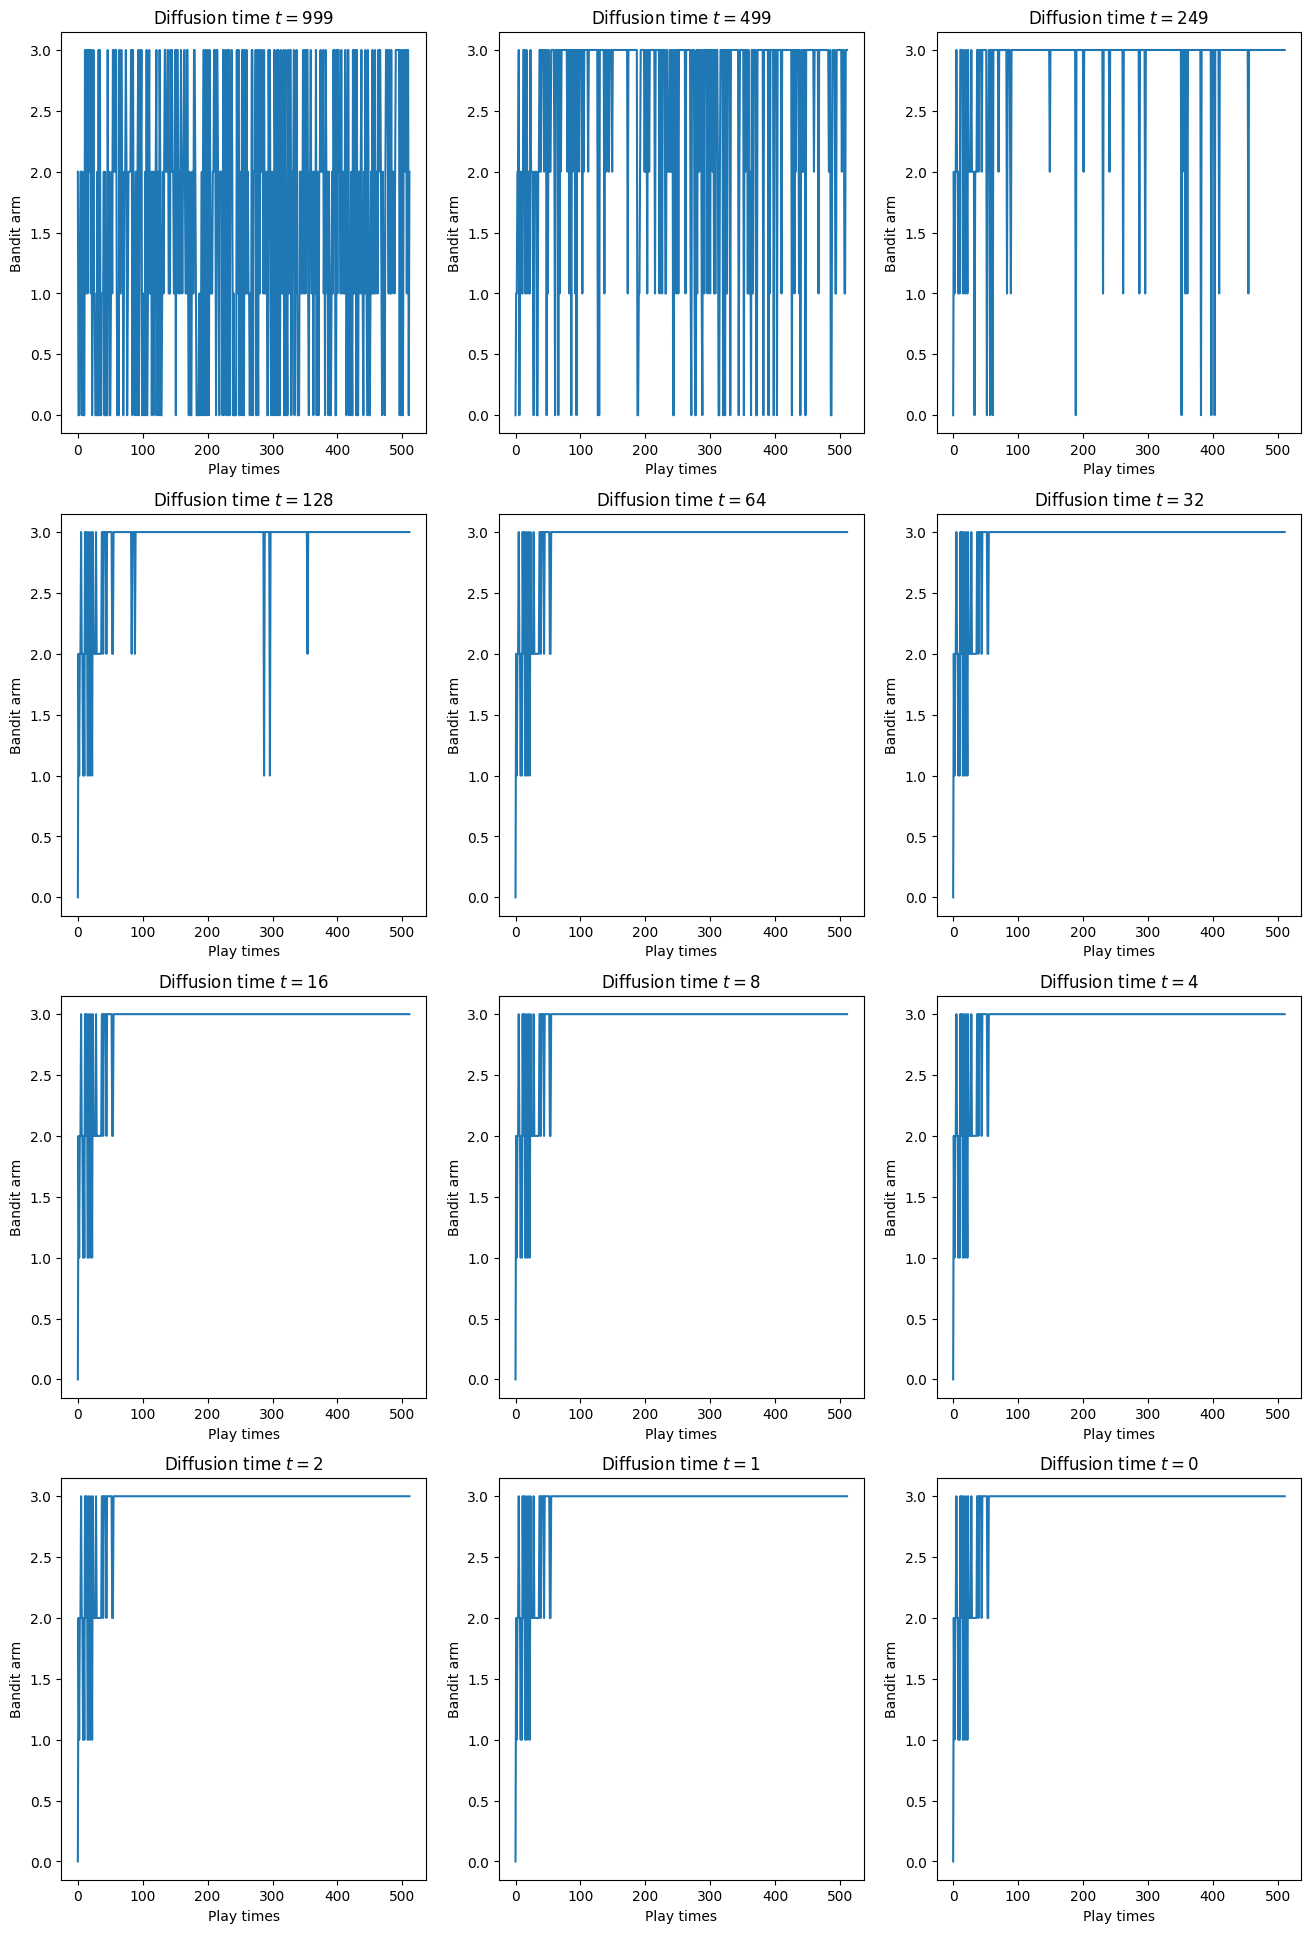

In [6]:
n=11

K=4
for n in range(7,12):
    N=(2**n)*5
    sample=torch.load(f"/bicmr/home/hengyuf04/Diffusion/multinomial_diffusion2/text_diffusion/samples/sample_chain_N{N}_K{K}_state_action.txt")
    show_t=[999,499,249,128,64,32,16,8,4,2,1,0]
    sample_num=0
    fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(16, 24))
    i = 0

    for ax in axes.flat:
        #ax.set_axis_off()
        action=sample[show_t[i], sample_num]//2**K
        state=[f'{int(id%(2**K)):04b}' for id in sample[show_t[i], sample_num]]
        ax.plot(action)
        ax.set_title(r"Diffusion time $t=$"+str(show_t[i]))
        ax.set_ylabel("Bandit arm")
        ax.set_xlabel("Play times")
        i = i+1
    plt.savefig(f"/bicmr/home/hengyuf04/Diffusion/multinomial_diffusion2/text_diffusion/figs/sample_chain_N{N}_K{K}_state_action.png")


In [164]:
s_a=[]
count=[0,0,0,0]
for id in sample[0, sample_num]:
    state=f'{int(id%(2**K)):04b}'
    action=id//(2**K)
    #print(f"state:{state} action:{action} consistent:{state[3-action]}")
    if state=='1110':
        count[3-action]+=1

In [165]:
count

[4, 9, 7, 0]

In [166]:
n=10
v=torch.randn((100000,n))
w=torch.randn((100000,1,1))

In [112]:
vvt=torch.einsum("ij,ik->ijk",v,v)
vvt=vvt-torch.eye(n)

In [113]:
torch.sum((w*vvt)**2)/100000

tensor(110.8656)